# COMP47670 Assignment 1
### Chungman Lee
### 23205535

# Task 1

For the assignment 1, I chose Global Warming API(http/global-warming.org) to analize cause and effect of global warming.

For the task 1, I will collect datasets of temperature, carbon dioxide, methane, nitrous oxide, polar ice, and ocean warming.

Import libraries that is needed for analysis.

In [222]:
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from functools import reduce
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

Setting for the data collection.

There was no need to use API key to access the datasets.

Create a list and a dictionary of the features that I want to use and corresponding endpoints.

In [223]:
api_prefix = "https://global-warming.org"

themes = ["Temperature", "Carbon_Dioxide", "Methane", "Nitrous_Oxide", "Polar_Ice", "Ocean_Warming"]
theme_endpoints = {"Temperature":"/api/temperature-api", 
                   "Carbon_Dioxide":"/api/co2-api", 
                   "Methane":"/api/methane-api", 
                   "Nitrous_Oxide":"/api/nitrous-oxide-api", 
                   "Polar_Ice":"/api/arctic-api",
                   "Ocean_Warming":"/api/ocean-warming-api"}


Create directory for raw data storage, if it does not already exist.

In [224]:
dir_raw = Path("raw")
dir_raw.mkdir(parents=True, exist_ok=True)

## I. Data Collection

Define the function for retrieving data from the Global Warming API

In [225]:
def fetch_data(endpoint, params={}):
    # construct the url
    url = api_prefix
    if not endpoint.startswith("/"):
        url += "/"
    url += endpoint
    
    full_url = url + "?" + urllib.parse.urlencode(params, doseq=True)
    print("Fetching %s" % full_url)
    
    # call API
    response = requests.get(full_url)
    if response.status_code == 200:
        json_data = response.json()
        return json_data
    else:
        print("Failed to fetch data: ", response.status_code)
        return None

Parameters were not needed for the API collecting because the dataset was specific enough, but added just in case.
Initialize params

In [226]:
params = {
}

Check the form ofthe raw datasets.

Used proper keys for each dataset to access to the result of the observation

All the data has no error according to the json file.

### 1. Temperature

This API shows the global mean surface temperature anomaly from 1880.01 in celsius.

The dataset's time feature's notational system is not usual because '.04' represents Jan and '.13' represnts Feb and so on.

In [227]:
endpoint = theme_endpoints["Temperature"]
temp_data = fetch_data(endpoint, params)

    # result 키의 값을 DataFrame으로 변환
if temp_data and 'result' in temp_data:
    df = pd.DataFrame(temp_data['result'])  
    df.set_index('time', inplace=True)
else:
    print("No data or 'result' key not found in the response")

# print out the top 12 examples
df.head(12)

Fetching https://global-warming.org/api/temperature-api?


,station,land
time,,
1880.04,-0.25,-0.18
1880.13,-0.44,-0.24
1880.21,-0.31,-0.09
1880.29,-0.51,-0.16
1880.38,-0.23,-0.10
1880.46,-0.39,-0.22
1880.54,-0.32,-0.18
1880.63,0.25,-0.10
1880.71,-0.36,-0.14


### 2. Carbon Dioxide

This API provides the amount of CO2 quasi-daily basis from 2013.02.06 although the description of the API said from 2010.01.01. The cycle feather is the value of co2 in shorter term while trend is in longer term.

>It is expressed as a mole fraction in dry air, parts per million (ppm).

In [228]:
endpoint = theme_endpoints["Carbon_Dioxide"]
co2_data = fetch_data(endpoint, params)

if co2_data and 'co2' in co2_data:
    df = pd.DataFrame(co2_data['co2'])
    df.set_index('year')
else:
    print("No data or 'co2' key not found in the response")

df.head(10)

Fetching https://global-warming.org/api/co2-api?


,year,month,day,cycle,trend
0,2013,2,6,396.08,394.56
1,2013,2,7,396.10,394.57
2,2013,2,8,396.12,394.58
3,2013,2,9,396.14,394.58
4,2013,2,10,396.16,394.59
5,2013,2,11,396.18,394.60
6,2013,2,12,396.20,394.61
7,2013,2,13,396.22,394.61
8,2013,2,14,396.23,394.62
9,2013,2,15,396.25,394.63


### 3. Methane

This API theamount of methane in the atmosphere on a monthly basis from 1984.11 eventhough the API description infromed it's from 1983.

The average feature expresses the average as a mole fraction in dry air, parts per million (ppm).

The trend feature means long-term trend not to include short-term volatility.

-Unc features are describing the uncertainty. The higher, the more uncertain.

In [229]:
endpoint = theme_endpoints["Methane"]
data = fetch_data(endpoint, params)

if data and 'methane' in data:
    df = pd.DataFrame(data['methane'])
else:
    print("No data or key not found in the response")

# print out the top 10 examples
df.head(10)

Fetching https://global-warming.org/api/methane-api?


,date,average,trend,averageUnc,trendUnc
0,1984.11,1653.79,1649.98,0.96,0.58
1,1984.12,1656.19,1651.07,1.06,0.58
2,1985.1,1655.60,1652.15,0.96,0.58
3,1985.2,1652.24,1653.16,1.36,0.58
4,1985.3,1654.60,1654.16,1.00,0.58
5,1985.4,1658.20,1655.18,0.83,0.59
6,1985.5,1655.88,1656.18,1.21,0.59
7,1985.6,1650.05,1657.18,1.22,0.59
8,1985.7,1646.81,1658.18,1.17,0.60
9,1985.8,1652.24,1659.20,1.06,0.61


The most recent 6 months data's uncertainty features are abnormal.
It seems it's not measured yet.

In [230]:
df.tail(6)

,date,average,trend,averageUnc,trendUnc
459,2023.2,1920.27,1919.93,-9.99,-9.99
460,2023.3,1919.87,1920.99,-9.99,-9.99
461,2023.4,1920.75,1922.09,-9.99,-9.99
462,2023.5,1920.20,1923.19,-9.99,-9.99
463,2023.6,1916.24,1924.29,-9.99,-9.99
464,2023.7,1915.25,1925.38,-9.99,-9.99


### 4. Nitrous Oxide

This API describe the amount of nitrous oxide n the atmosphere from 2002.5 on a monthly basis, even though the descripiton said it's from 2001.
The features of the data is similar with methane.

In [231]:
endpoint = theme_endpoints["Nitrous_Oxide"]
data = fetch_data(endpoint, params)

if data and 'nitrous' in data:
    df = pd.DataFrame(data['nitrous'])
else:
    print("No data or key not found in the response")

# print out the top 10 examples
df.head(10)

Fetching https://global-warming.org/api/nitrous-oxide-api?


,date,average,trend,averageUnc,trendUnc
0,2002.5,316.85,316.88,0.14,0.13
1,2002.6,316.83,316.92,0.14,0.13
2,2002.7,316.82,316.95,0.14,0.14
3,2002.8,316.82,316.99,0.14,0.14
4,2002.9,316.87,317.03,0.14,0.14
5,2002.10,316.99,317.08,0.15,0.15
6,2002.11,317.13,317.13,0.16,0.15
7,2002.12,317.24,317.18,0.16,0.15
8,2003.1,317.29,317.24,0.16,0.15
9,2003.2,317.34,317.30,0.16,0.15


### 5. Polar Ice

This API provides the average monthly arctic sea ice extent each September since 1979, derived from satellite observations.

Data-type is the name of the data provider and all the datat of the hemisphere feature is northern, so can be removed later.

extent means the extent of the ice containing sea water among ices, while the area feature stands for the area of the ice without sea water.

The higer rank, the smaller polar ice.

In [232]:
endpoint = theme_endpoints["Polar_Ice"]
data = fetch_data(endpoint, params)

if data and 'arcticData':
    df = pd.DataFrame(data['arcticData'])
else:
    print("No data or key not found in the response")

# print out the top 10 examples
df.head(10)

Fetching https://global-warming.org/api/arctic-api?


,Column1,year,month,data-type,hemisphere,extent,area,rank
0,0,1979,9,Goddard,N,7.05,4.58,33.0
1,1,1980,9,Goddard,N,7.67,4.87,43.0
2,2,1981,9,Goddard,N,7.14,4.44,34.5
3,3,1982,9,Goddard,N,7.30,4.43,37.0
4,4,1983,9,Goddard,N,7.39,4.70,39.0
5,5,1984,9,Goddard,N,6.81,4.11,31.0
6,6,1985,9,Goddard,N,6.70,4.23,29.0
7,7,1986,9,Goddard,N,7.41,4.72,40.0
8,8,1987,9,Goddard,N,7.28,5.64,36.0
9,9,1988,9,Goddard,N,7.37,5.36,38.0


### 6. Ocean Warming

This data provide the sea surface temperature from 1880 to 2020 anually.

It's reconstructed and smoothed dataset.

The base period is 1901-2000 and the degree is celsius.

In [233]:
endpoint = theme_endpoints["Ocean_Warming"]
data = fetch_data(endpoint, params)

if data:
    result_data = data.get('result', {})
    if result_data:
        df = pd.DataFrame(list(result_data.items()), columns=['Year', 'Temperature Anomaly'])
    else:
        print("The 'result' key is not found in the data")
else:
    print("No data was fetched")

# print out the top 10 examples
df.head(10)

Fetching https://global-warming.org/api/ocean-warming-api?


,Year,Temperature Anomaly
0,1880,-0.02
1,1881,0.04
2,1882,0.03
3,1883,-0.04
4,1884,-0.11
5,1885,-0.17
6,1886,-0.16
7,1887,-0.20
8,1888,-0.01
9,1889,0.00


## II. Save in the directory

Now, define a function for collect and store datasets.

In [234]:
def fetch_global_warming_data(theme):
    endpoint = theme_endpoints[theme]
    params = {}
    global_warming_data = fetch_data(endpoint, params)
    fname = "%s.json" % theme
    out_path = dir_raw / fname
    print("Writing data to %s" % out_path)
    fout = open(out_path, "w")
    json.dump(global_warming_data, fout, indent=4)
    fout.close()

Fetch and write the dataset using for loop.

In [235]:
for theme in themes:
    fetch_global_warming_data(theme)

Fetching https://global-warming.org/api/temperature-api?
Writing data to raw\Temperature.json
Fetching https://global-warming.org/api/co2-api?
Writing data to raw\Carbon_Dioxide.json
Fetching https://global-warming.org/api/methane-api?
Writing data to raw\Methane.json
Fetching https://global-warming.org/api/nitrous-oxide-api?
Writing data to raw\Nitrous_Oxide.json
Fetching https://global-warming.org/api/arctic-api?
Writing data to raw\Polar_Ice.json
Fetching https://global-warming.org/api/ocean-warming-api?
Writing data to raw\Ocean_Warming.json


# Task 2

Key settings

In [236]:
fontsize = 13

Diretory for data storage

In [237]:
dir_data = Path("data")
dir_data.mkdir(parents=True, exist_ok=True)

## I. Data Preprocessing

Firstly, read datasets properly and make dataframes to merge in one dataset.

I will merge the datasets according to the time on monthly bases.

### 1. Temerature

As I mentioned in part 1, this dataset has a different style to describe date.

I'll change datetime data in a same foramt(period monthly) and set it as an index for all datasets

Firstly, for temperature dataset, create a date column and check if it matches with the values of time feature

In [238]:
temp_raw = pd.read_json('./raw/Temperature.json')
temp_result = temp_raw['result'].apply(pd.Series)
temp_result['date'] = pd.period_range('1880.01.01', '2023.09.30', freq='M')
temp_result

,time,station,land,date
0,1880.04,-0.25,-0.18,1880-01
1,1880.13,-0.44,-0.24,1880-02
2,1880.21,-0.31,-0.09,1880-03
3,1880.29,-0.51,-0.16,1880-04
4,1880.38,-0.23,-0.10,1880-05
...,...,...,...,...
1720,2023.38,1.14,0.93,2023-05
1721,2023.46,1.34,1.07,2023-06
1722,2023.54,1.44,1.18,2023-07
1723,2023.63,1.38,1.19,2023-08


Now, remove the columns that won't be used and set date as an index of the dataframe because date matches well.

I removed station column because land feature is enough to analize the overall land surface temperature anomaly.

In [239]:
temp_result =  temp_result.set_index('date').drop(['time', 'station'], axis=1).rename(columns={'land':'temp_land'})
temp_result

,temp_land
date,
1880-01,-0.18
1880-02,-0.24
1880-03,-0.09
1880-04,-0.16
1880-05,-0.10
...,...
2023-05,0.93
2023-06,1.07
2023-07,1.18


Check if there is missing values

In [240]:
temp_result.isnull().sum()

temp_land    0
dtype: int64

### 2. Carbon Dioxide

Read data

In [241]:
co2_raw = pd.read_json('./raw/Carbon_Dioxide.json')
co2_result = co2_raw['co2'].apply(pd.Series)
co2_result

,year,month,day,cycle,trend
0,2013,2,6,396.08,394.56
1,2013,2,7,396.10,394.57
2,2013,2,8,396.12,394.58
3,2013,2,9,396.14,394.58
4,2013,2,10,396.16,394.59
...,...,...,...,...,...
3926,2023,11,7,419.65,420.15
3927,2023,11,8,419.70,420.16
3928,2023,11,9,419.75,420.16
3929,2023,11,10,419.80,420.17


firstly, combine the 3 columns into one datetime column.

In [242]:
co2_result['date'] = pd.to_datetime(co2_result[['year', 'month', 'day']])
co2_result.drop(['year', 'month', 'day'], axis = 1, inplace = True)
co2_result

,cycle,trend,date
0,396.08,394.56,2013-02-06
1,396.10,394.57,2013-02-07
2,396.12,394.58,2013-02-08
3,396.14,394.58,2013-02-09
4,396.16,394.59,2013-02-10
...,...,...,...
3926,419.65,420.15,2023-11-07
3927,419.70,420.16,2023-11-08
3928,419.75,420.16,2023-11-09
3929,419.80,420.17,2023-11-10


In [243]:
co2_result = co2_result.set_index('date').rename(columns={'cycle':'co2_cycle', 'trend':'co2_trend'})
co2_result

,co2_cycle,co2_trend
date,,
2013-02-06,396.08,394.56
2013-02-07,396.10,394.57
2013-02-08,396.12,394.58
2013-02-09,396.14,394.58
2013-02-10,396.16,394.59
...,...,...
2023-11-07,419.65,420.15
2023-11-08,419.70,420.16
2023-11-09,419.75,420.16


Now, chage the string values into numeric data and resample it into monthly using maen. To do this, change the values into numeric.

In [244]:
co2_result['co2_cycle'] = pd.to_numeric(co2_result['co2_cycle'], errors='coerce')
co2_result['co2_trend'] = pd.to_numeric(co2_result['co2_trend'], errors='coerce')
co2_result = co2_result.resample('M', kind = 'period').mean()
co2_result

,co2_cycle,co2_trend
date,,
2013-02,396.260870,394.643478
2013-03,396.443871,394.841613
2013-04,396.927333,395.061667
2013-05,397.455484,395.274839
2013-06,396.405333,395.483000
...,...,...
2023-07,417.664516,419.360645
2023-08,415.926452,419.573871
2023-09,416.641333,419.785000


Check if there is missing values because I set errors='coerce' when I parse string into true number.

In [245]:
co2_result.isnull().sum()

co2_cycle    0
co2_trend    0
dtype: int64

### 3. Methane

Read methane dataset

In [246]:
methane_raw = pd.read_json('./raw/Methane.json')
methane_result = methane_raw['methane'].apply(pd.Series)
methane_result

,date,average,trend,averageUnc,trendUnc
0,1984.11,1653.79,1649.98,0.96,0.58
1,1984.12,1656.19,1651.07,1.06,0.58
2,1985.1,1655.60,1652.15,0.96,0.58
3,1985.2,1652.24,1653.16,1.36,0.58
4,1985.3,1654.60,1654.16,1.00,0.58
...,...,...,...,...,...
460,2023.3,1919.87,1920.99,-9.99,-9.99
461,2023.4,1920.75,1922.09,-9.99,-9.99
462,2023.5,1920.20,1923.19,-9.99,-9.99
463,2023.6,1916.24,1924.29,-9.99,-9.99


Change the date columns into period and set it index.

Drop unused features for analyzation.

Change the name of the columns.

In [247]:
methane_result['date'] = pd.to_datetime(methane_result['date'].astype(str), format='%Y.%m').dt.to_period('M')
methane_result.set_index('date', inplace = True)
methane_result.drop(['averageUnc', 'trendUnc'], axis=1, inplace = True)
methane_result.rename(columns={'average':'methane_average', 'trend':'methane_trend'}, inplace=True)
methane_result

,methane_average,methane_trend
date,,
1984-11,1653.79,1649.98
1984-12,1656.19,1651.07
1985-01,1655.60,1652.15
1985-02,1652.24,1653.16
1985-03,1654.60,1654.16
...,...,...
2023-03,1919.87,1920.99
2023-04,1920.75,1922.09
2023-05,1920.20,1923.19


Check if there are missing values

In [248]:
methane_result.isnull().sum()

methane_average    0
methane_trend      0
dtype: int64

### 4. Nitrous Oxide

same format with the methane so I'll omit the description

In [249]:
no_raw = pd.read_json('./raw/Nitrous_Oxide.json')
no_result = no_raw['nitrous'].apply(pd.Series)
no_result

,date,average,trend,averageUnc,trendUnc
0,2002.5,316.85,316.88,0.14,0.13
1,2002.6,316.83,316.92,0.14,0.13
2,2002.7,316.82,316.95,0.14,0.14
3,2002.8,316.82,316.99,0.14,0.14
4,2002.9,316.87,317.03,0.14,0.14
...,...,...,...,...,...
250,2023.3,336.58,336.47,-9.99,-9.99
251,2023.4,336.58,336.57,-9.99,-9.99
252,2023.5,336.58,336.66,-9.99,-9.99
253,2023.6,336.61,336.76,-9.99,-9.99


In [250]:
no_result['date'] = pd.to_datetime(no_result['date'].astype(str), format='%Y.%m').dt.to_period('M')
no_result.set_index('date', inplace = True)
no_result.drop(['averageUnc', 'trendUnc'], axis=1, inplace = True)
no_result.rename(columns={'average':'nitrous_average', 'trend':'nitrous_trend'}, inplace=True)
no_result

,nitrous_average,nitrous_trend
date,,
2002-05,316.85,316.88
2002-06,316.83,316.92
2002-07,316.82,316.95
2002-08,316.82,316.99
2002-09,316.87,317.03
...,...,...
2023-03,336.58,336.47
2023-04,336.58,336.57
2023-05,336.58,336.66


Check if there are missing values

In [251]:
no_result.isnull().sum()

nitrous_average    0
nitrous_trend      0
dtype: int64

### 5. Polar Ice

In [252]:
ice_raw = pd.read_json('./raw/Polar_Ice.json')
ice_result = ice_raw['arcticData'].apply(pd.Series)
ice_result

,Column1,year,month,data-type,hemisphere,extent,area,rank
0,0,1979,9,Goddard,N,7.05,4.58,33.0
1,1,1980,9,Goddard,N,7.67,4.87,43.0
2,2,1981,9,Goddard,N,7.14,4.44,34.5
3,3,1982,9,Goddard,N,7.30,4.43,37.0
4,4,1983,9,Goddard,N,7.39,4.70,39.0
5,5,1984,9,Goddard,N,6.81,4.11,31.0
6,6,1985,9,Goddard,N,6.70,4.23,29.0
7,7,1986,9,Goddard,N,7.41,4.72,40.0
8,8,1987,9,Goddard,N,7.28,5.64,36.0
9,9,1988,9,Goddard,N,7.37,5.36,38.0


Create a date column using year and month columns

In [253]:
# compine year and month 
ice_result['date'] = ice_result['year'].astype(str) + '-' + ice_result['month'].astype(str)

# string -> datetime -> period
ice_result['date'] = pd.to_datetime(ice_result['date']).dt.to_period('M')

ice_result

,Column1,year,month,data-type,hemisphere,extent,area,rank,date
0,0,1979,9,Goddard,N,7.05,4.58,33.0,1979-09
1,1,1980,9,Goddard,N,7.67,4.87,43.0,1980-09
2,2,1981,9,Goddard,N,7.14,4.44,34.5,1981-09
3,3,1982,9,Goddard,N,7.30,4.43,37.0,1982-09
4,4,1983,9,Goddard,N,7.39,4.70,39.0,1983-09
5,5,1984,9,Goddard,N,6.81,4.11,31.0,1984-09
6,6,1985,9,Goddard,N,6.70,4.23,29.0,1985-09
7,7,1986,9,Goddard,N,7.41,4.72,40.0,1986-09
8,8,1987,9,Goddard,N,7.28,5.64,36.0,1987-09
9,9,1988,9,Goddard,N,7.37,5.36,38.0,1988-09


Drop unused columns and set index and rename columns

In [254]:
ice_result.drop(['Column1', 'year', 'month', 'data-type','hemisphere'], axis=1, inplace=True)
ice_result = ice_result.set_index('date').rename(columns={'extent':'ice_extent', 'area':'ice_area', 'rank':'ice_rank'})
ice_result

,ice_extent,ice_area,ice_rank
date,,,
1979-09,7.05,4.58,33.0
1980-09,7.67,4.87,43.0
1981-09,7.14,4.44,34.5
1982-09,7.30,4.43,37.0
1983-09,7.39,4.70,39.0
1984-09,6.81,4.11,31.0
1985-09,6.70,4.23,29.0
1986-09,7.41,4.72,40.0
1987-09,7.28,5.64,36.0


Now, to merge it properly with monthly datasets, reindex into Monthly and fill ampty values using method ffill.

In [255]:
ice_result = ice_result.resample('M').ffill()
ice_result

,ice_extent,ice_area,ice_rank
date,,,
1979-09,7.05,4.58,33.0
1979-10,7.05,4.58,33.0
1979-11,7.05,4.58,33.0
1979-12,7.05,4.58,33.0
1980-01,7.05,4.58,33.0
...,...,...,...
2021-05,4.00,2.83,2.0
2021-06,4.00,2.83,2.0
2021-07,4.00,2.83,2.0


Check if there are missing values.

In [256]:
ice_result.isnull().sum()

ice_extent    0
ice_area      0
ice_rank      0
dtype: int64

### 6. Ocean Warming

Due to the structure of the json file, I used open() method instead of using read_jason() method.

In [257]:
# Load the JSON data from the file
file_path = './raw/Ocean_Warming.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the 'result' part of the JSON data
result_data = data['result']

ocean_result = pd.DataFrame(list(result_data.items()), columns=['date', 'temp_ocean'])

ocean_result

,date,temp_ocean
0,1880,-0.02
1,1881,0.04
2,1882,0.03
3,1883,-0.04
4,1884,-0.11
...,...,...
138,2018,0.66
139,2019,0.74
140,2020,0.72
141,2021,0.63


Change date column's datatype into dateime and set it as an index.
Resample monthly and use ffill.
Change it into periodindex.

In [258]:
ocean_result['date'] = pd.to_datetime(ocean_result['date'].astype(str) + '-01-01')

ocean_result.set_index('date', inplace=True)

ocean_result = ocean_result.resample('M').ffill()

ocean_result.index = ocean_result.index.to_period('M')

ocean_result

,temp_ocean
date,
1880-01,-0.02
1880-02,-0.02
1880-03,-0.02
1880-04,-0.02
1880-05,-0.02
...,...
2021-09,0.63
2021-10,0.63
2021-11,0.63


Check if there are missing values

In [259]:
ocean_result.isnull().sum()

temp_ocean    0
dtype: int64

### 7. Data Parsing and Merging
Now, merge all the datasets into one dataset.

The problem is starting periods and ending periods of the datasets are different. 

Temperature -> 1880-01 ~ 2023-09

Carbon_Dioxide -> 2013-02 ~ 2023-11

Methane -> 1984-11 ~ 2023-07

Nitrous_Oxide -> 2002-05 ~ 2023-07

Polar_Ice -> 1979-09 ~ 2021-09

Ocean_Warming -> 1880-01 ~ 2022-01

But I decided to keep it outer join and NaN, and change the period flexibly when I analize this dataset.

In [260]:
dataframes = [temp_result, co2_result, methane_result, no_result, ice_result, ocean_result]
global_warming_data = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dataframes)
global_warming_data

,temp_land,co2_cycle,co2_trend,methane_average,methane_trend,nitrous_average,nitrous_trend,ice_extent,ice_area,ice_rank,temp_ocean
date,,,,,,,,,,,
1880-01,-0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02
1880-02,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02
1880-03,-0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02
1880-04,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02
1880-05,-0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02
...,...,...,...,...,...,...,...,...,...,...,...
2023-07,1.18,417.664516,419.360645,1915.25,1925.38,336.66,336.85,NaN,NaN,NaN,NaN
2023-08,1.19,415.926452,419.573871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.47,416.641333,419.785000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make the columns multi.

In [261]:
# move temp_ocean column besides of the temp_land
col = global_warming_data.pop('temp_ocean')
global_warming_data.insert(1, col.name, col)

# change the columns into multi columns using _ as a separator
new_columns = [(col.split('_')[0], col.split('_')[1]) if '_' in col else ('temp', col)
               for col in global_warming_data.columns]
global_warming_data.columns = pd.MultiIndex.from_tuples(new_columns)
global_warming_data

temp                co2              methane          nitrous  \
          land  ocean       cycle       trend  average    trend average   
date                                                                      
1880-01  -0.18  -0.02         NaN         NaN      NaN      NaN     NaN   
1880-02  -0.24  -0.02         NaN         NaN      NaN      NaN     NaN   
1880-03  -0.09  -0.02         NaN         NaN      NaN      NaN     NaN   
1880-04  -0.16  -0.02         NaN         NaN      NaN      NaN     NaN   
1880-05  -0.10  -0.02         NaN         NaN      NaN      NaN     NaN   
...        ...    ...         ...         ...      ...      ...     ...   
2023-07   1.18    NaN  417.664516  419.360645  1915.25  1925.38  336.66   
2023-08   1.19    NaN  415.926452  419.573871      NaN      NaN     NaN   
2023-09   1.47    NaN  416.641333  419.785000      NaN      NaN     NaN   
2023-10    NaN    NaN  418.400000  419.996129      NaN      NaN     NaN   
2023-11    NaN    NaN  419.591818  420.141818      NaN      NaN     NaN   

                   ice            
          trend extent area rank  
date                              
1880-01     NaN    NaN  NaN  NaN  
1880-02     NaN    NaN  NaN  NaN  
1880-03     NaN    NaN  NaN  NaN  
1880-04     NaN    NaN  NaN  NaN  
1880-05     NaN    NaN  NaN  NaN  
...         ...    ...  ...  ...  
2023-07  336.85    NaN  NaN  NaN  
2023-08     NaN    NaN  NaN  NaN  
2023-09     NaN    NaN  NaN  NaN  
2023-10     NaN    NaN  NaN  NaN  
2023-11     NaN    NaN  NaN  NaN  

[1727 rows x 11 columns]

### 8. Normalization
Normalize with MinMaxScaler() method of skitlearn.

In [262]:
scaler = MinMaxScaler()
global_warming_data = pd.DataFrame(scaler.fit_transform(global_warming_data), index = global_warming_data.index, columns=global_warming_data.columns)
global_warming_data

temp                 co2             methane       nitrous        \
             land     ocean     cycle     trend   average trend average trend   
date                                                                            
1880-01  0.276316  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-02  0.250000  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-03  0.315789  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-04  0.285088  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-05  0.311404  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
...           ...       ...       ...       ...       ...   ...     ...   ...   
2023-07  0.872807       NaN  0.875981  0.969364  0.966237   1.0     1.0   1.0   
2023-08  0.877193       NaN  0.814598  0.977726       NaN   NaN     NaN   NaN   
2023-09  1.000000       NaN  0.839846  0.986006       NaN   NaN     NaN   NaN   
2023-10       NaN       NaN  0.901956  0.994286       NaN   NaN     NaN   NaN   
2023-11       NaN       NaN  0.944047  1.000000       NaN   NaN     NaN   NaN   

           ice            
        extent area rank  
date                      
1880-01    NaN  NaN  NaN  
1880-02    NaN  NaN  NaN  
1880-03    NaN  NaN  NaN  
1880-04    NaN  NaN  NaN  
1880-05    NaN  NaN  NaN  
...        ...  ...  ...  
2023-07    NaN  NaN  NaN  
2023-08    NaN  NaN  NaN  
2023-09    NaN  NaN  NaN  
2023-10    NaN  NaN  NaN  
2023-11    NaN  NaN  NaN  

[1727 rows x 11 columns]

### 9. Data Saving

In [263]:
fname = 'global_warming_data.json'
out_path = dir_data / fname
print('writing %s' % out_path)
global_warming_data.to_json(out_path, indent=4)
out_path

writing data\global_warming_data.json


WindowsPath('data/global_warming_data.json')

## II. Data Analysis

### 1. Data Loading

Load json and change columns and index like before.

In [264]:
df_gw = pd.read_json('./data/global_warming_data.json')
df_gw.columns = pd.MultiIndex.from_tuples(eval(index) for index in df_gw.columns)
df_gw.index.name = 'month'
df_gw.index = pd.PeriodIndex(df_gw.index, freq='M')
df_gw

temp                 co2             methane       nitrous        \
             land     ocean     cycle     trend   average trend average trend   
month                                                                           
1880-01  0.276316  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-02  0.250000  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-03  0.315789  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-04  0.285088  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
1880-05  0.311404  0.352941       NaN       NaN       NaN   NaN     NaN   NaN   
...           ...       ...       ...       ...       ...   ...     ...   ...   
2023-07  0.872807       NaN  0.875981  0.969364  0.966237   1.0     1.0   1.0   
2023-08  0.877193       NaN  0.814598  0.977726       NaN   NaN     NaN   NaN   
2023-09  1.000000       NaN  0.839846  0.986006       NaN   NaN     NaN   NaN   
2023-10       NaN       NaN  0.901956  0.994286       NaN   NaN     NaN   NaN   
2023-11       NaN       NaN  0.944047  1.000000       NaN   NaN     NaN   NaN   

           ice            
        extent area rank  
month                     
1880-01    NaN  NaN  NaN  
1880-02    NaN  NaN  NaN  
1880-03    NaN  NaN  NaN  
1880-04    NaN  NaN  NaN  
1880-05    NaN  NaN  NaN  
...        ...  ...  ...  
2023-07    NaN  NaN  NaN  
2023-08    NaN  NaN  NaN  
2023-09    NaN  NaN  NaN  
2023-10    NaN  NaN  NaN  
2023-11    NaN  NaN  NaN  

[1727 rows x 11 columns]

Make a method to remove rows which contain NaN when I make a subset.

In [265]:
def make_subset(df_gw, column1, column2=None, column3=None, column4=None):
    subset1 = df_gw[[column1]].dropna()
    
    if column2 is not None:
        subset2 = df_gw[[column2]].dropna()
        subset = pd.merge(subset1, subset2, left_index=True, right_index=True, how='inner')
        if column3 is not None:
            subset3 = df_gw[[column3]].dropna()
            subset = pd.merge(subset, subset3, left_index=True, right_index=True, how='inner')
            if column4 is not None:
                subset4 = df_gw[[column4]].dropna()
                subset = pd.merge(subset, subset4, left_index=True, right_index=True, how='inner')
                scaler = MinMaxScaler()
                subset = pd.DataFrame(scaler.fit_transform(subset), index = subset.index, columns=subset.columns)
            else:
                scaler = MinMaxScaler()
                subset = pd.DataFrame(scaler.fit_transform(subset), index = subset.index, columns=subset.columns)
        else:
            scaler = MinMaxScaler()
            subset = pd.DataFrame(scaler.fit_transform(subset), index = subset.index, columns=subset.columns)
    else:
        subset = subset1
    
    return subset

In [266]:
make_subset(df_gw, ['temp', 'land'], 'co2')

temp       co2          
             land     cycle     trend
month                                
2013-02  0.095745  0.120074  0.000000
2013-03  0.148936  0.126537  0.007881
2013-04  0.000000  0.143611  0.016633
2013-05  0.085106  0.162263  0.025112
2013-06  0.170213  0.125176  0.033392
...           ...       ...       ...
2023-05  0.425532  1.000000  0.966788
2023-06  0.574468  0.967810  0.974876
2023-07  0.691489  0.875981  0.983121
2023-08  0.702128  0.814598  0.991602
2023-09  1.000000  0.839846  1.000000

[128 rows x 3 columns]

### 2. General Information of Features(Box Plot, Histogram, KDE)
Let's check median, quartile, and outliers of features with Box plots.

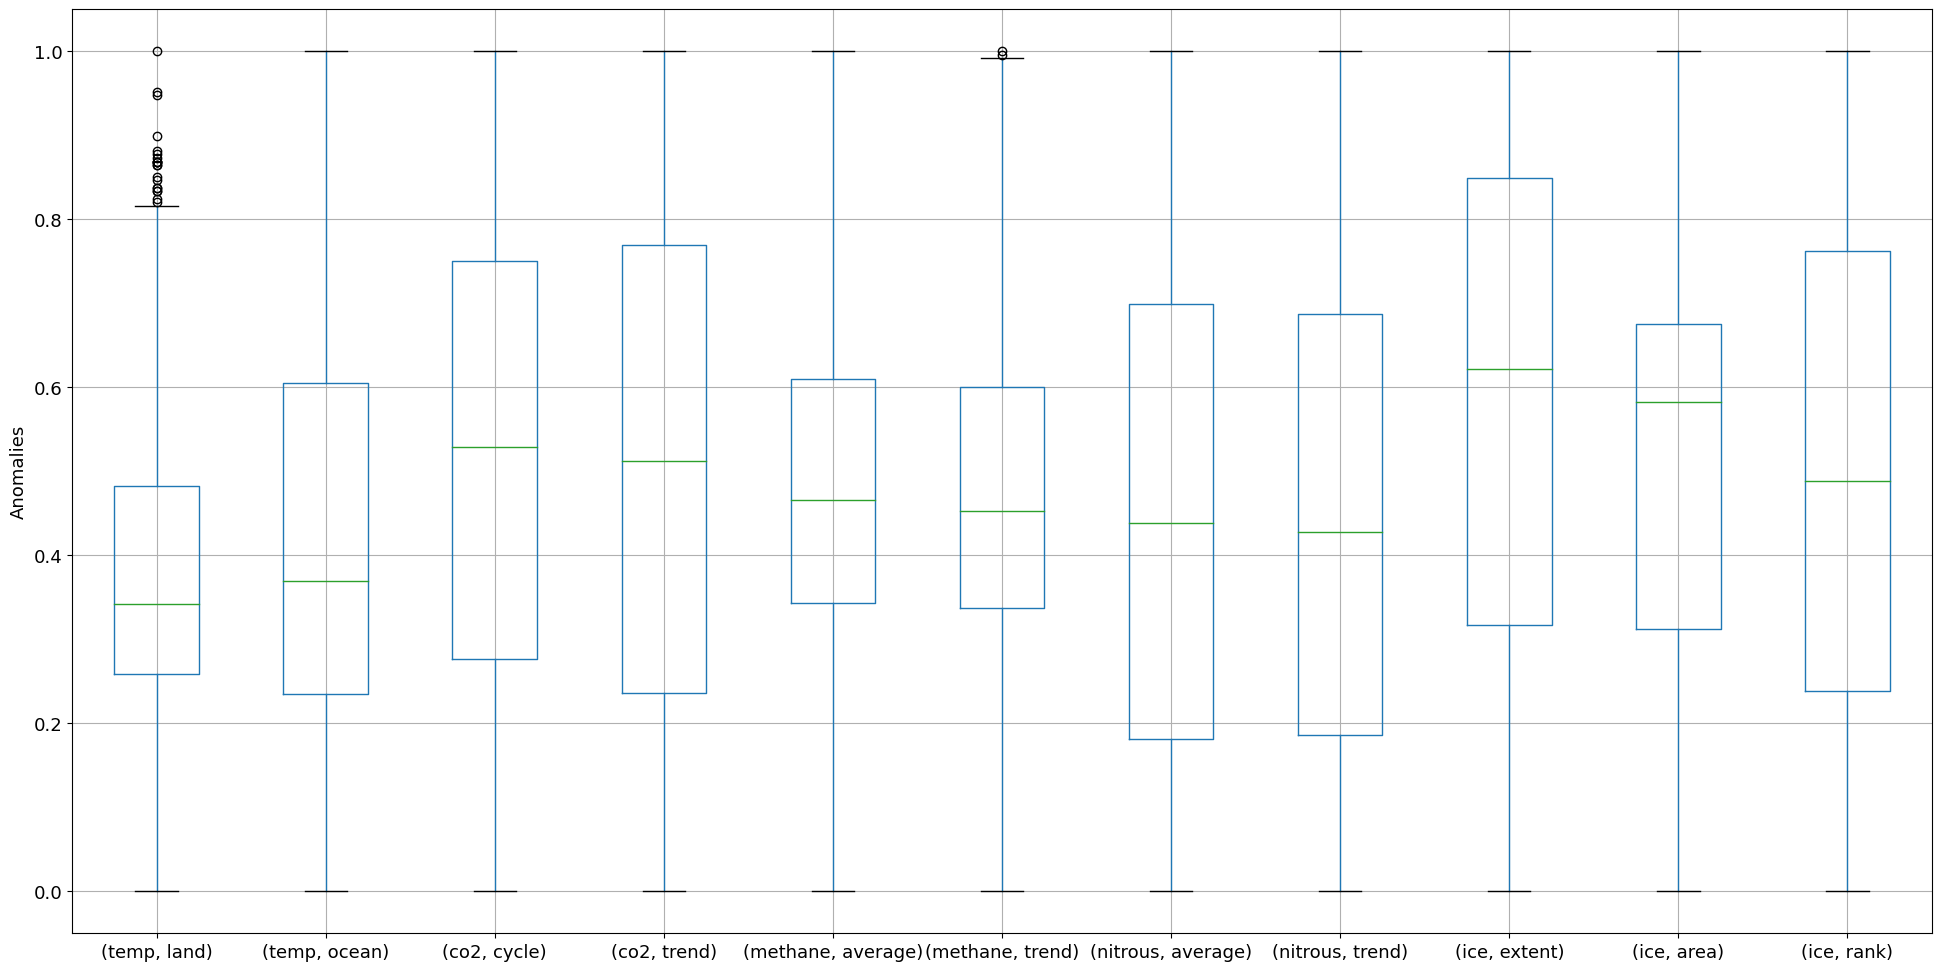

In [267]:
ax = df_gw.boxplot(figsize=(24,12), fontsize=fontsize)
ax.set_ylabel("Anomalies", fontsize=fontsize);

According to this box plots, the thing that stands out most is that column of land temperature has many outliers than others. This represent that there ar outsatanding anomalies of land temperature. Furthermore, the median of land temperature anomalies is lowest in this box plot(0.35 apploximately) and Q3 is lower than 0.5, so I can see that land temperature feature has high anomalies. However, this describe lowest IQR so the values of Q1~Q3 are concentrated in the range. On the other hand, Ocean temperature has low median value also(second place from the botton), but it's IQR is larger than land.

Among the greenhouse gases, methane's IQR is the smallest one, its Q3 is lowest. Especially, only trend of methane contains outliers. Other two bos frames are similar with teh box plot of standard normal distribution, while nitrous oxide's box is lower than the center.

It is notable that ice extend feature's median is highest, which means that it the extent of small northern polar ice have often been observed. The area's median is higher then the center, like the extent, but IQR is more like standard normal distribution.

Now, I will describe histogram and KDE to see the distribution more.

I could check the frequency of the values more intuitively through the histogram, while I could see the distribution of the values continuous format through KDE.  

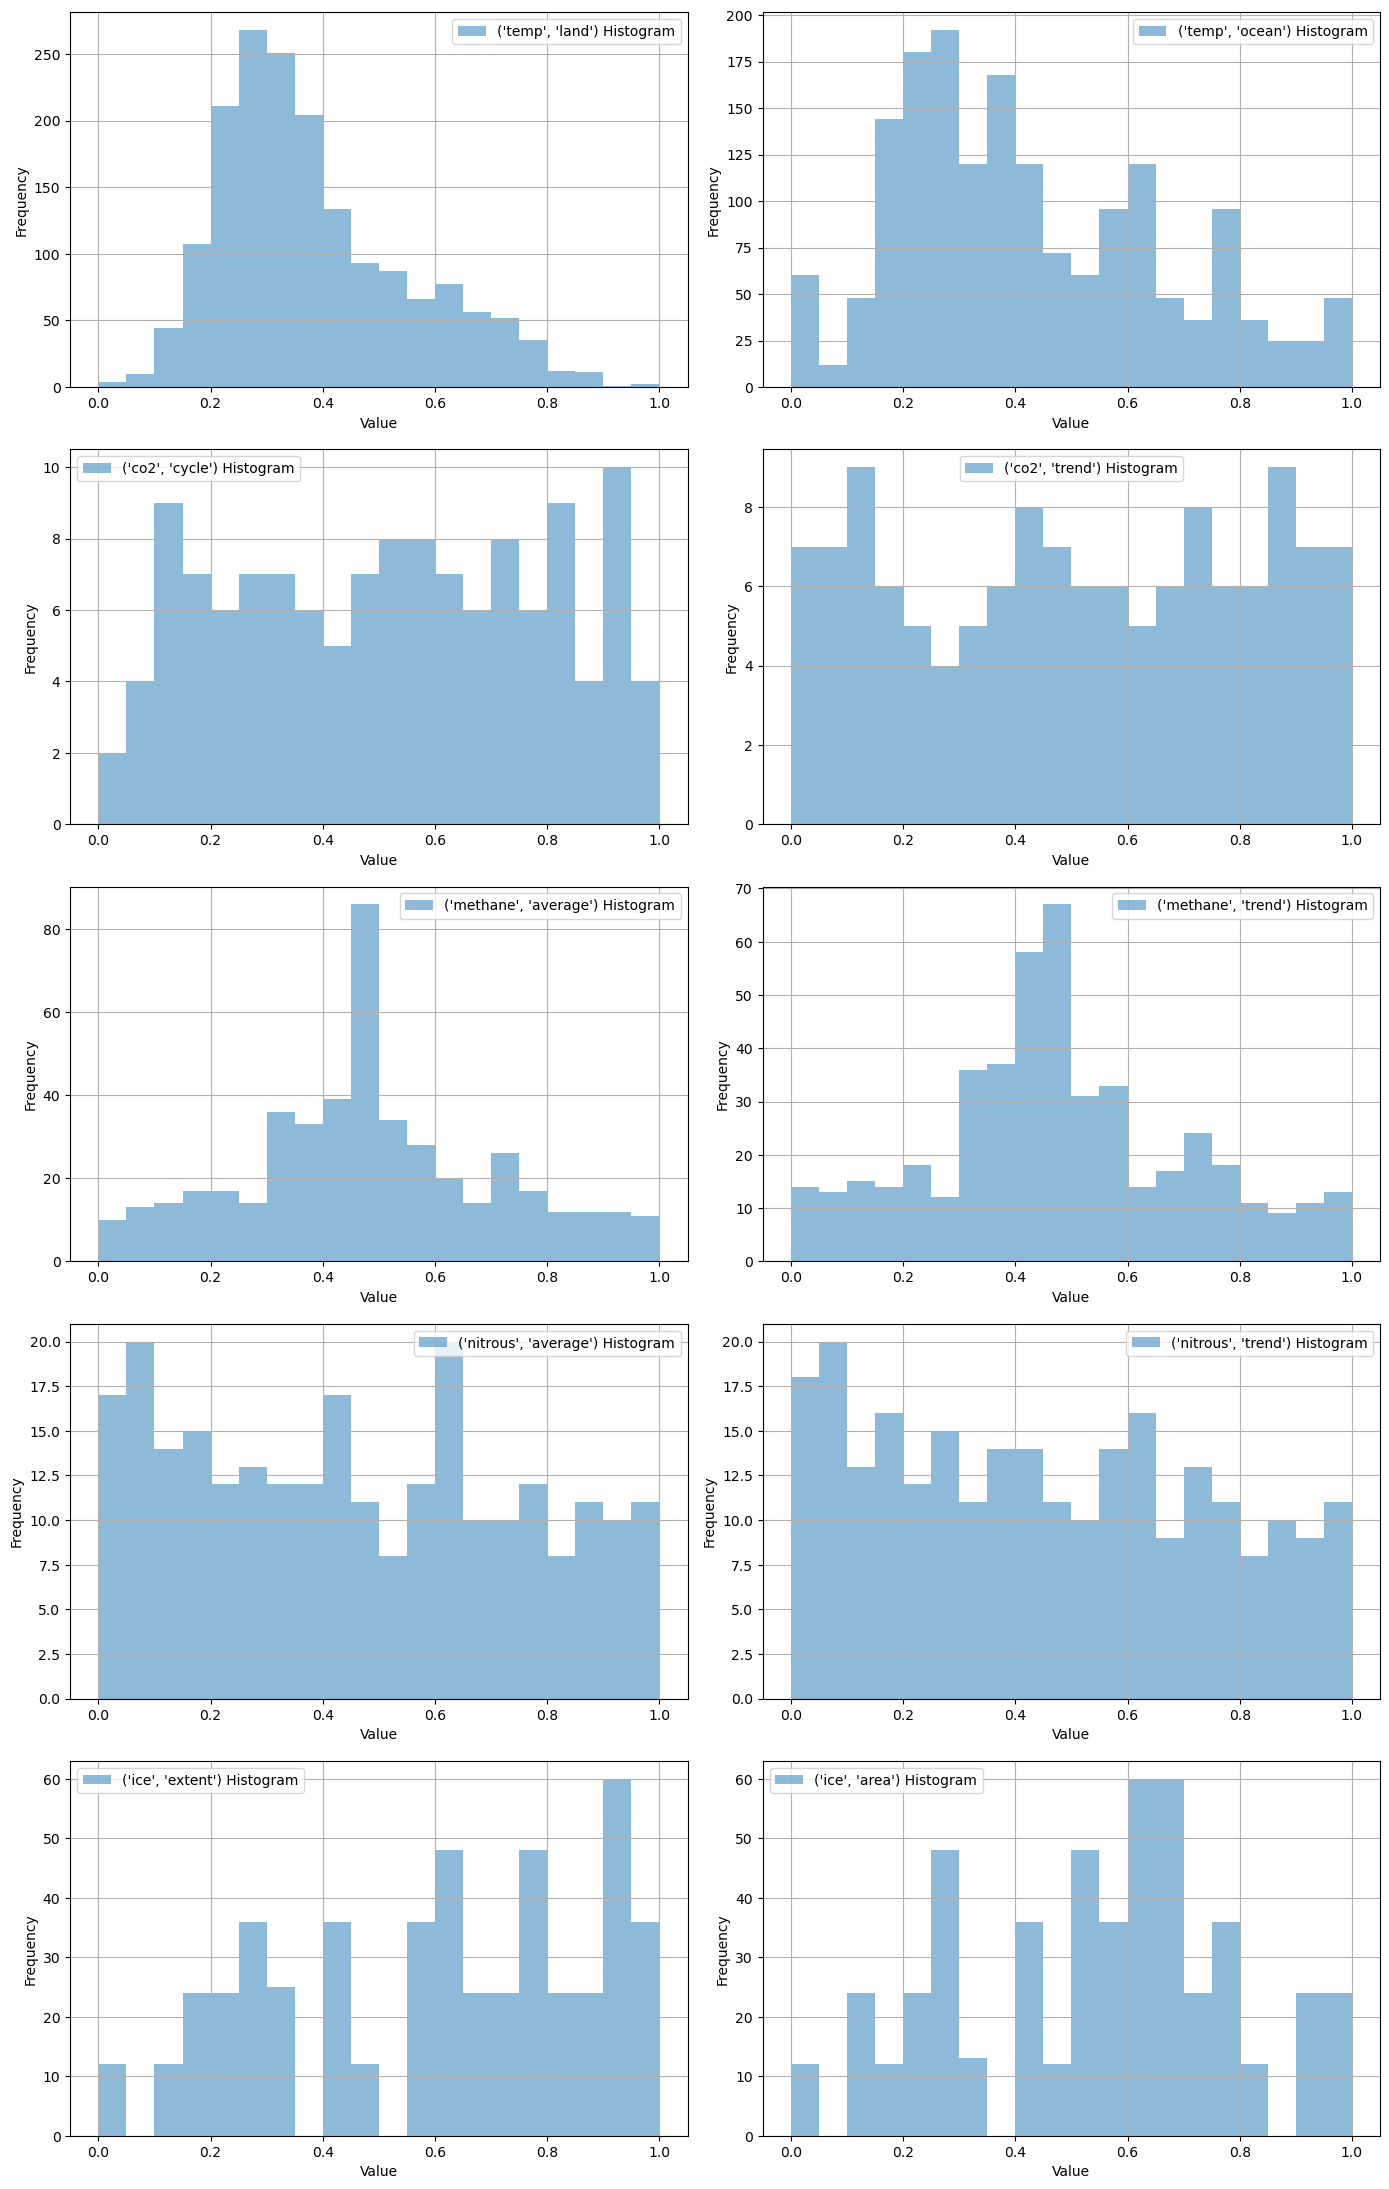

In [268]:
binded_key = [('temp', 'land'), ('temp', 'ocean'),
              ('co2', 'cycle'),('co2', 'trend'),
              ('methane', 'average'), ('methane', 'trend'),
              ('nitrous', 'average'), ('nitrous', 'trend'),
              ('ice', 'extent'), ('ice', 'area')
             ]
rows = 5
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(14, 22)) 
axes = axes.flatten()

for i, column in enumerate(binded_key):
    ax = axes[i]
    df_gw[column].hist(bins=20, alpha=0.5, ax=ax, label=f'{column} Histogram')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


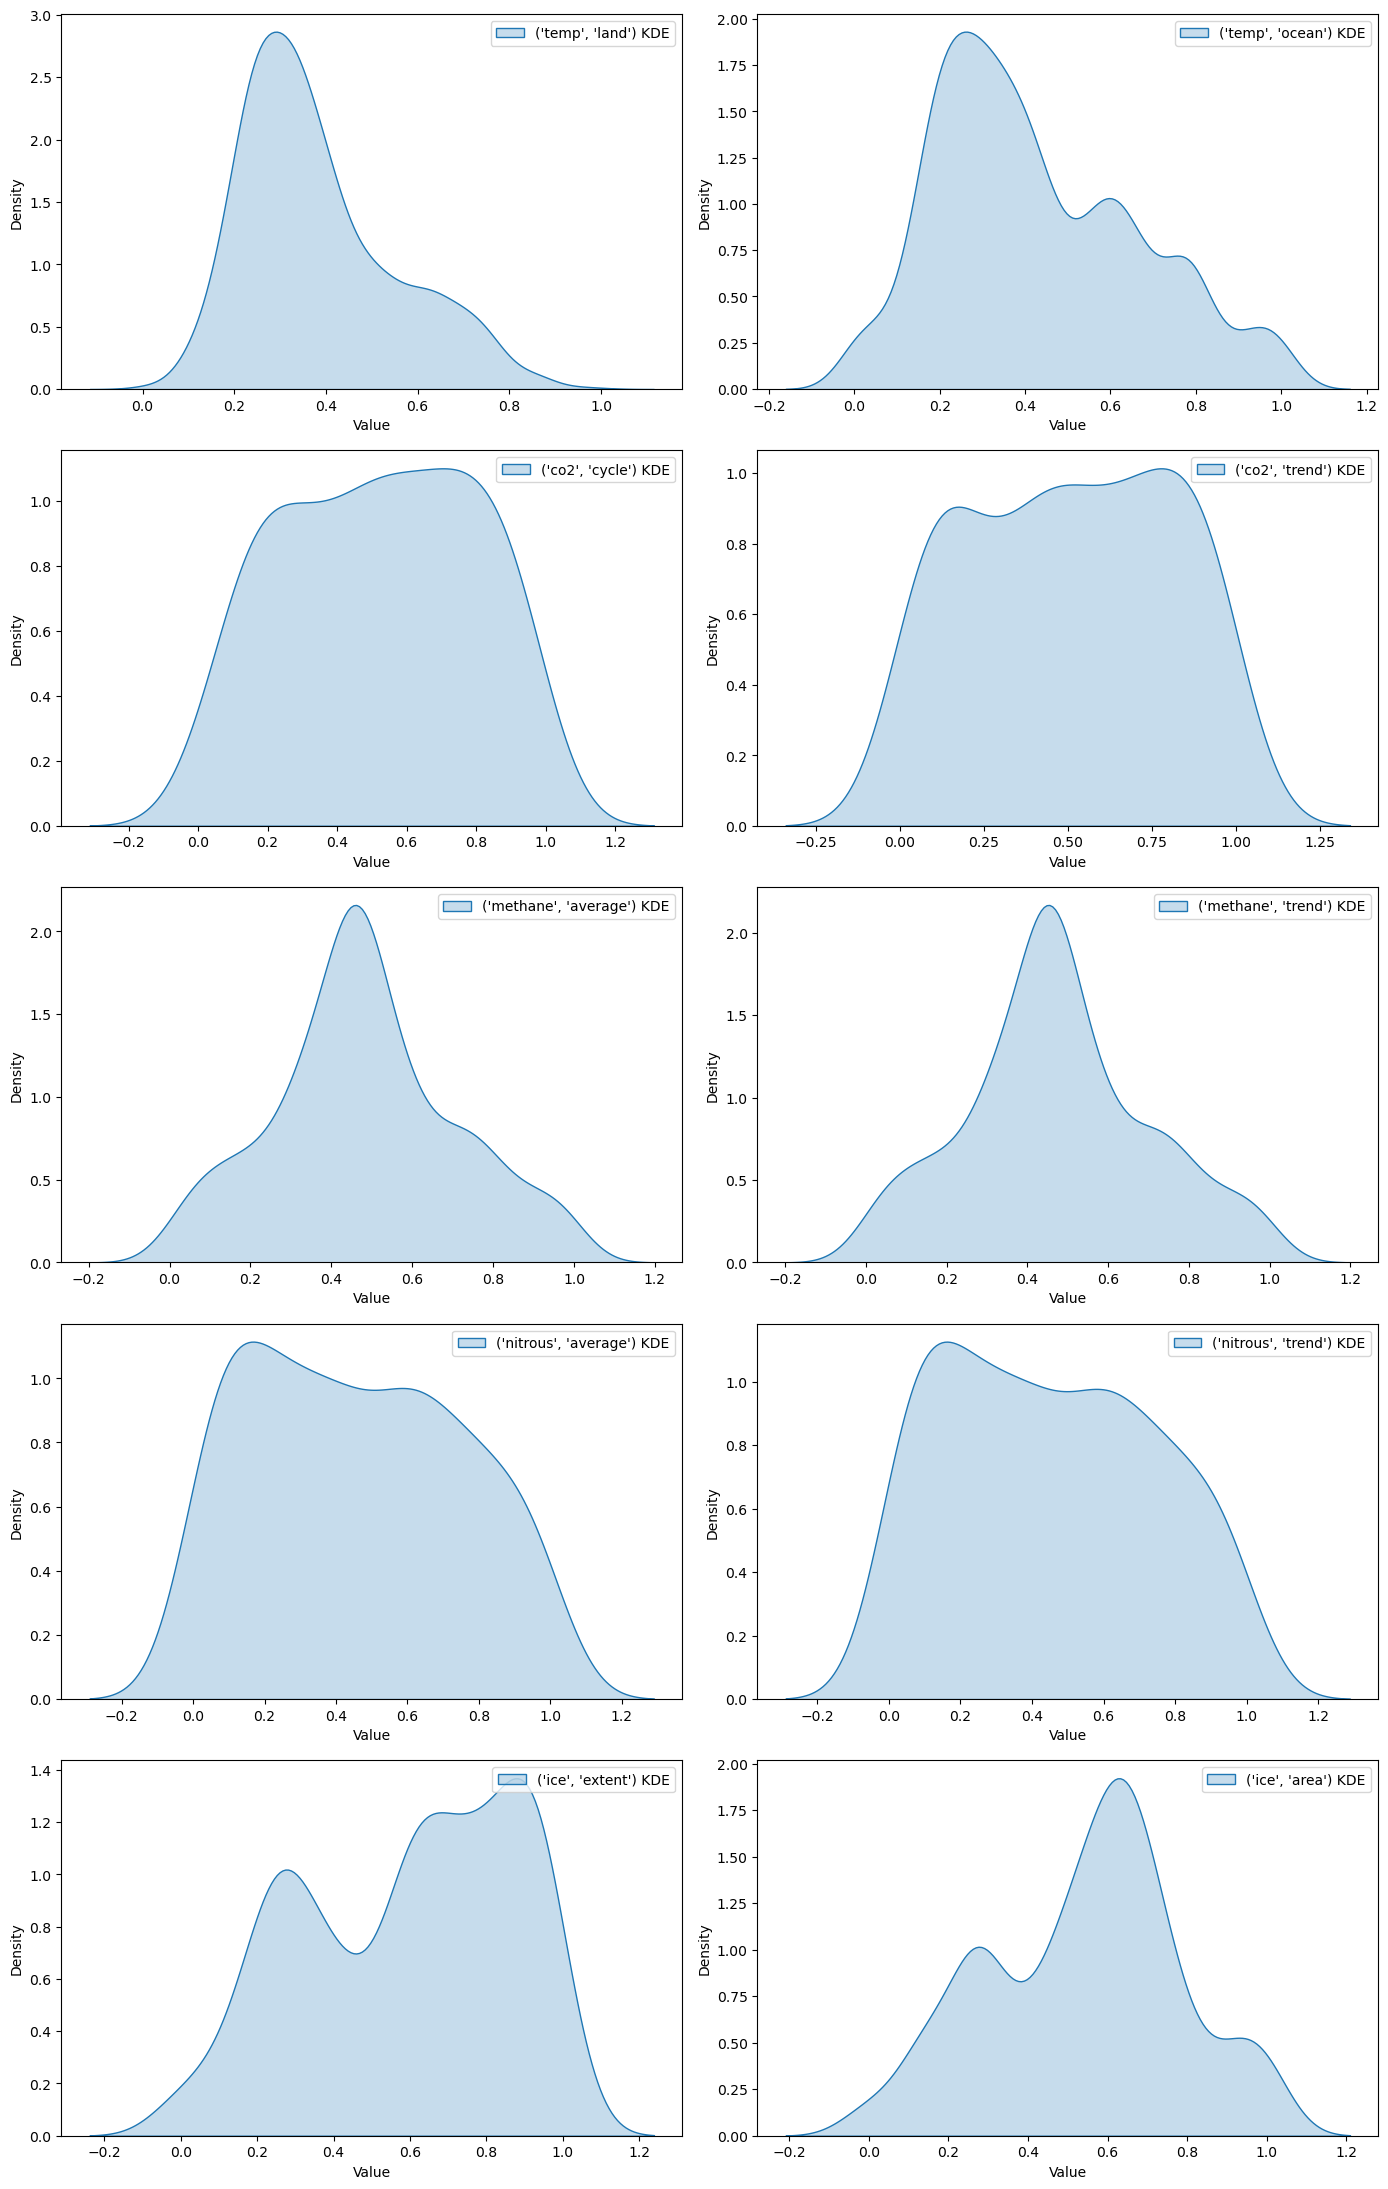

In [269]:
fig, axes = plt.subplots(rows, cols, figsize=(14, 22)) 
axes = axes.flatten()

for i, column in enumerate(binded_key):
    ax = axes[i]
    sns.kdeplot(df_gw[column], fill=True, ax=ax, label=f'{column} KDE')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Investigating these histogram and KDE, I could the bell-shaped curb with the peak at the center at the land temperature and methane, which means that the data is concentrated near the median as I've checked in the box plot. The tail is extended over the range(0~1), it's just because KDE made it smooth.

Most of the shape is similar with my expectation when I checked the box plot. Except for the polar ice feature, other feature's central axis of the bell shape is obviously on the right side, while co2 is  bit ambiguous in the KDE.

### 3. Analize Each Columns with Line Plot

#### i. Temprature Anonaly Monthly

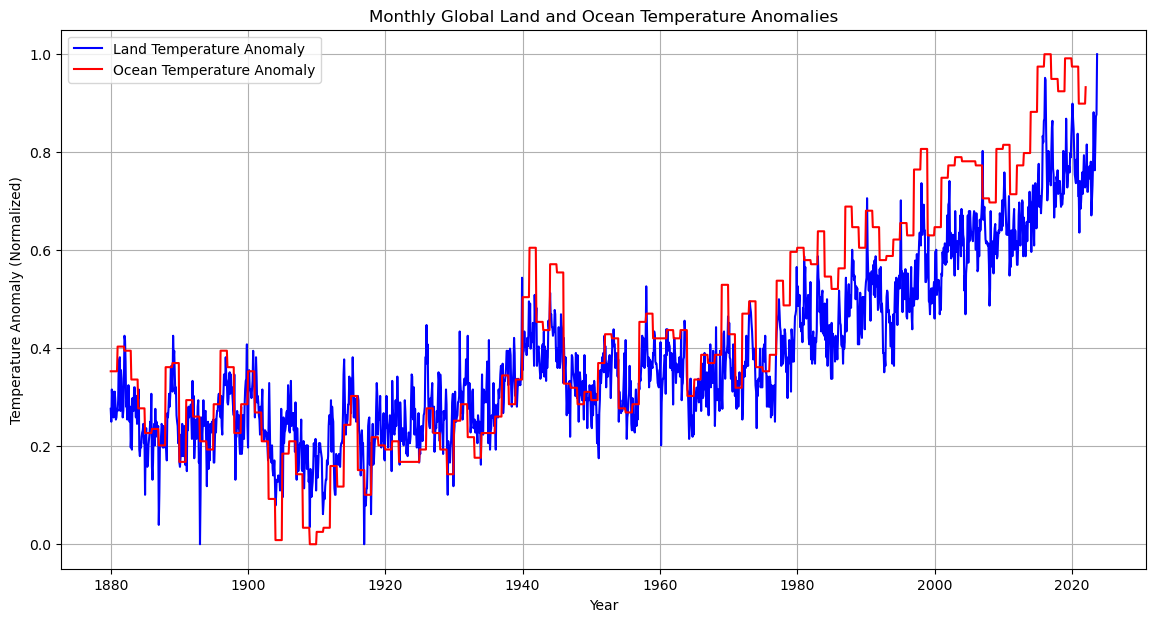

In [270]:
plt.figure(figsize=(14, 7))
plt.plot(df_gw.index.to_timestamp(), df_gw[('temp', 'land')], label='Land Temperature Anomaly', color='blue')
plt.plot(df_gw.index.to_timestamp(), df_gw[('temp', 'ocean')], label='Ocean Temperature Anomaly', color='red')
plt.title('Monthly Global Land and Ocean Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (Normalized)')
plt.legend()
plt.grid(True)

Land temperature dataset is monthly, while ocean temperature dataset is yearly. Therefore, the shape is a little bit different because I filled the dataset with ffill method.

Both lines describe that the temperature is increasing from late 20th centry. Especially, both temperature data shows a significant temperature increase from 21 centry.

To the next, I would perform Time series decompmosion. As other features are yearly datasets or already have trend features, I've just done it for this feature.

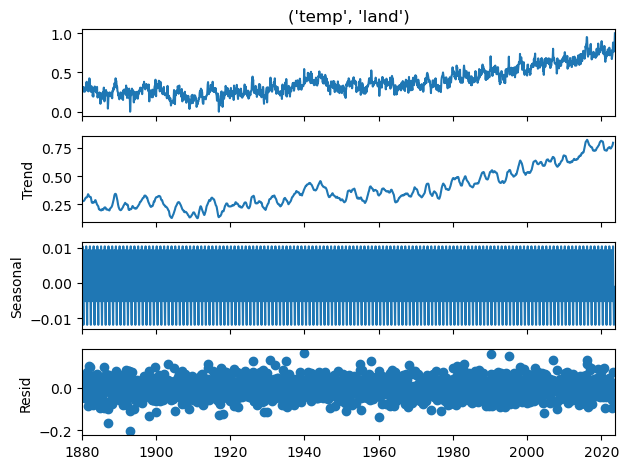

In [271]:
land_subset = make_subset(df_gw, ['temp', 'land'])
time_series = land_subset['temp','land']
time_series.index = time_series.index.to_timestamp()
result = seasonal_decompose(time_series, model='additive', period=12)
result.plot()
plt.show()

On the trend graph, I could check the long term trend of land temteratur apart from seasonality and residual. The trend graph shows generally increasing temperature anomaly like the original data, which is indicating global warming.

Also, I can see the seperated seasonal volatility and exstra residuals.

Let's visualize the trend with moving window.

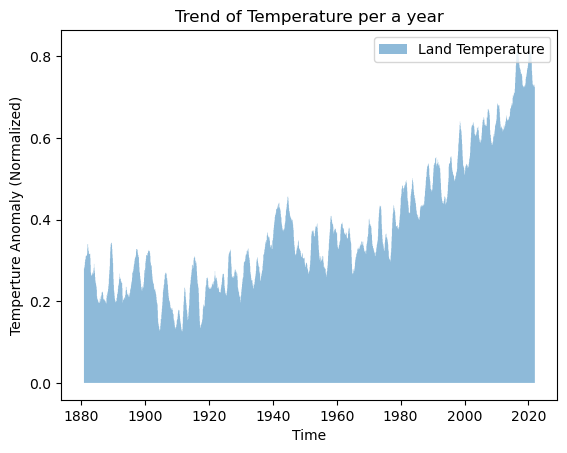

In [272]:
subset_temp_gases = make_subset(df_gw,'temp')

subset_temp_gases['temp','land'] = subset_temp_gases['temp','land'].rolling(window=12).mean()

plt.fill_between(subset_temp_gases.index.to_timestamp(), subset_temp_gases['temp','land'], label='Land Temperature', step='mid', alpha=0.5)

plt.title('Trend of Temperature per a year')
plt.xlabel('Time')
plt.ylabel('Temperture Anomaly (Normalized)')
plt.legend()
plt.show()

#### ii. Greenhouse Gases Anomaly Monthly

In the dataset, there are features that is indicating cycle(co2) and average(Methane, N2O).

Let's check this first with a line graph.

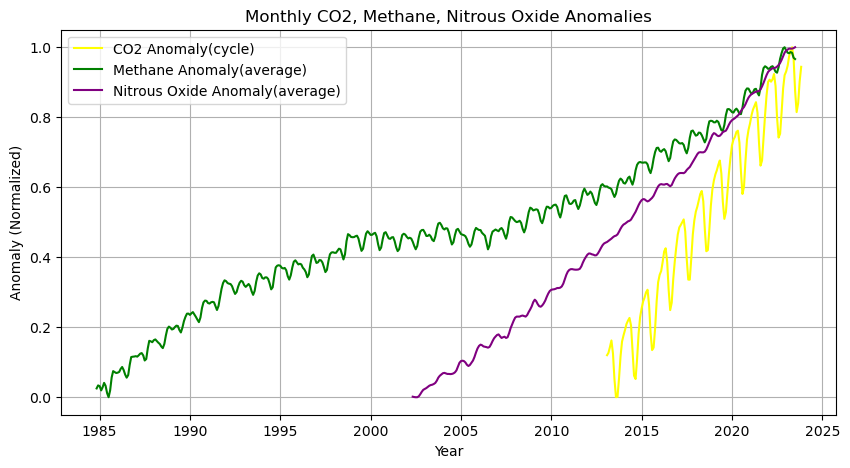

In [273]:
plt.figure(figsize=(10, 5))
plt.plot(df_gw.index.to_timestamp(), df_gw[('co2', 'cycle')], label='CO2 Anomaly(cycle)', color='yellow')
plt.plot(df_gw.index.to_timestamp(), df_gw[('methane', 'average')], label='Methane Anomaly(average)', color='green')
plt.plot(df_gw.index.to_timestamp(), df_gw[('nitrous', 'average')], label='Nitrous Oxide Anomaly(average)', color='purple')
plt.title('Monthly CO2, Methane, Nitrous Oxide Anomalies')
plt.xlabel('Year')
plt.ylabel('Anomaly (Normalized)')
plt.legend()
plt.grid(True)

As the observation period is different, I can't compare each other directly. However, I could check all the greenhouse gases are increasing noticeably.

Let's use trend feature which is without cycle, seasonality, and so on.

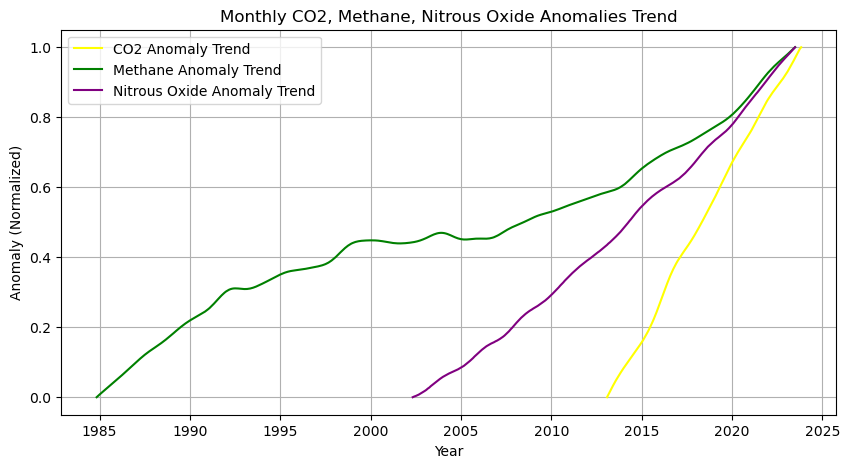

In [274]:
plt.figure(figsize=(10, 5))
plt.plot(df_gw.index.to_timestamp(), df_gw[('co2', 'trend')], label='CO2 Anomaly Trend', color='yellow')
plt.plot(df_gw.index.to_timestamp(), df_gw[('methane', 'trend')], label='Methane Anomaly Trend', color='green')
plt.plot(df_gw.index.to_timestamp(), df_gw[('nitrous', 'trend')], label='Nitrous Oxide Anomaly Trend', color='purple')
plt.title('Monthly CO2, Methane, Nitrous Oxide Anomalies Trend')
plt.xlabel('Year')
plt.ylabel('Anomaly (Normalized)')
plt.legend()
plt.grid(True)

I could check the long-term trend with the trend features.

#### iii. Polar Ice

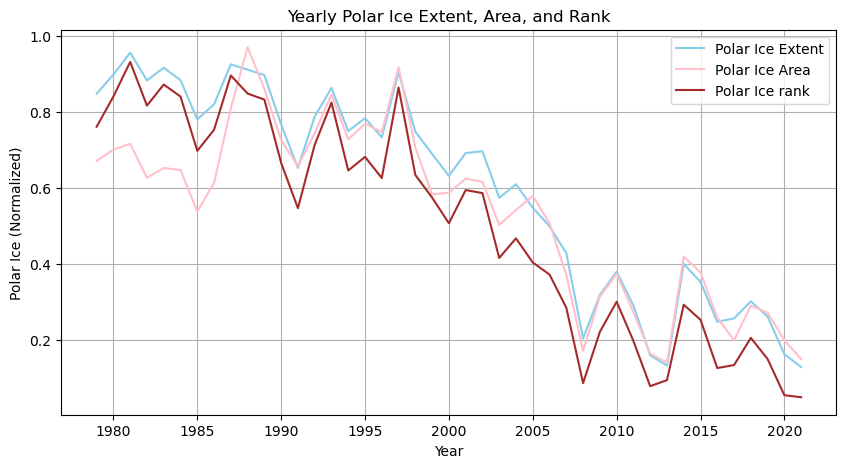

In [275]:
subset_ice = make_subset(df_gw, 'ice')
subset_ice = subset_ice.resample('Y', kind='period').mean()
subset_ice
plt.figure(figsize=(10, 5))
plt.plot(subset_ice.index.to_timestamp(), subset_ice[('ice', 'extent')], label='Polar Ice Extent', color='skyblue')
plt.plot(subset_ice.index.to_timestamp(), subset_ice[('ice', 'area')], label='Polar Ice Area', color='pink')
plt.plot(subset_ice.index.to_timestamp(), subset_ice[('ice', 'rank')], label='Polar Ice rank', color='brown')
plt.title('Yearly Polar Ice Extent, Area, and Rank')
plt.xlabel('Year')
plt.ylabel('Polar Ice (Normalized)')
plt.legend()
plt.grid(True)

All the lines of ice features have similar shape, because they are interrelated. The extend and area of the ice is decreasing which is implying the detrimental effect of global warming.

### 4. Correlation between Feature

#### i. Heatmap
Now, I'll check the correlations coefficient between features with heatmap.

In [276]:
def plot_heatmap(title, df_gw, figsize=(8, 10)):
    df_corr = df_gw.corr()
    
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df_corr, square=True, cbar=False,
                annot=True, cmap=cmap, linewidths=0.5, vmin=-1)
    ax.set_title(title)

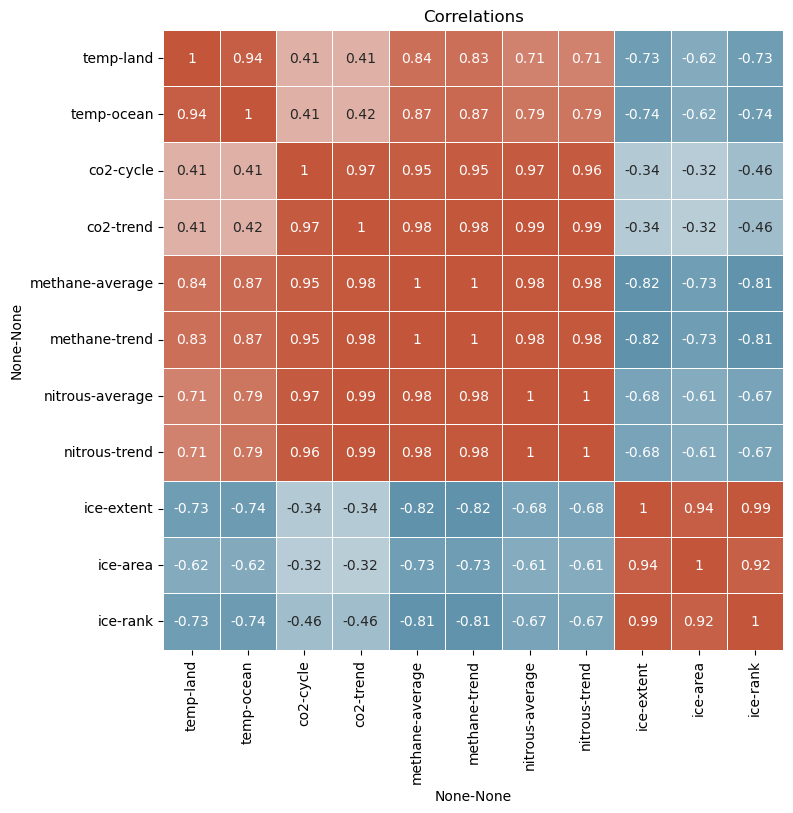

In [277]:
plot_heatmap("Correlations", df_gw)

In this heatmap, the thing that catches my eyes most is that CO2 has a moderate correlation with temperature, recording 0.4 approximately. It's the lowest correlation with temperature among greenhouse gases, and it has the lowest correlation with the polar ice feature consistently.

The other two greenhouse gases has high correlations with temperature and polar ice, while Methane has the greatest infuluence on temperature and polar ice. Obviously, polar ice features have negative correlations with other features, while the others have positive correlations.

All the greenhouse gases have extremely strong positive correlation coefficient with each other recording almost 1.

### 5. Temprature + Other Columns

#### i.  Splatter Plot with Trend Line

To the next, I'll draw splatter plots and trend lines to visualize the distribution and correlations between temperature features and the other features. Now I can compare the correlations with temperature among greenhouse gases because I'll make the subset for each gas feature's period and normalize again with the make_subset method I've created before.

Firstly, define a method which shows the trendline and splatter plot.

In [278]:
def temp_and_another_trendline(df, column1, column2):
    df_temp_another = make_subset(df_gw, 'temp', f'{column1}')

    plt.figure(figsize=(5, 5))

    # calculate linear regression coefficients for trend line
    land_coefs = np.polyfit(df_temp_another[(f'{column1}', f'{column2}')], df_temp_another[('temp', 'land')], 1)
    land_trend = np.poly1d(land_coefs)

    ocean_coefs = np.polyfit(df_temp_another[(f'{column1}', f'{column2}')], df_temp_another[('temp', 'ocean')], 1)
    ocean_trend = np.poly1d(ocean_coefs)

    #describe the graph
    plt.scatter(df_temp_another[f'{column1}', f'{column2}'], df_temp_another['temp', 'land'], alpha=0.5, color='blue', label='Land Temperature', marker='x')
    plt.plot(df_temp_another[(f'{column1}', f'{column2}')], land_trend(df_temp_another[(f'{column1}', f'{column2}')]), "b--")
    plt.scatter(df_temp_another[f'{column1}', f'{column2}'], df_temp_another['temp', 'ocean'], alpha=0.5, color='red', label='Ocean Temperature', marker='x')
    plt.plot(df_temp_another[(f'{column1}', f'{column2}')], ocean_trend(df_temp_another[(f'{column1}', f'{column2}')]), "r--")

    plt.title(f'Relationship between {column1} {column2} and temperature')
    plt.xlabel(f'{column1} {column2} (Normalized)')
    plt.ylabel('temperature (Normalized)')
    plt.legend()

    plt.show()

Now, call the method for each greenhouse gases.

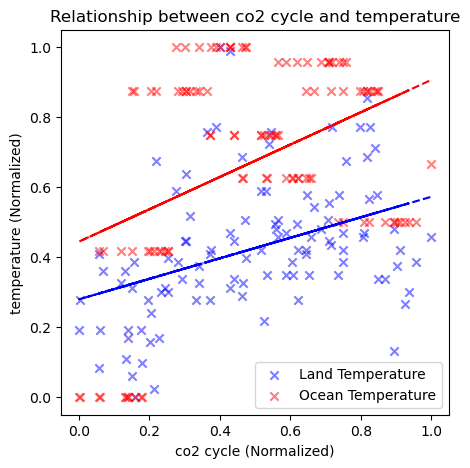

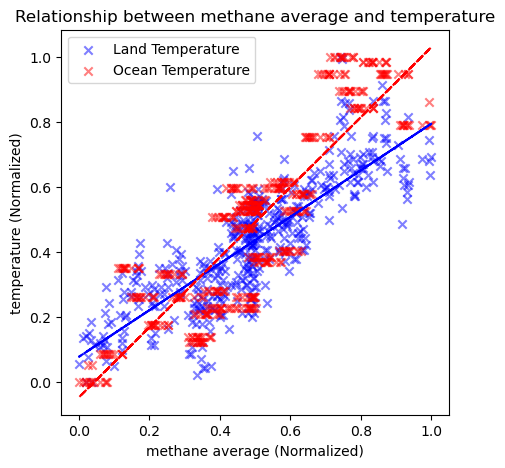

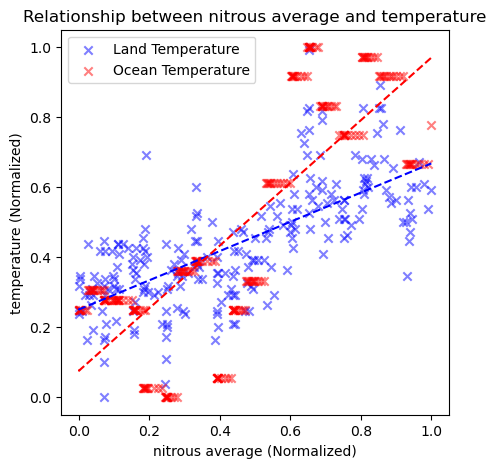

In [279]:
temp_and_another_trendline(df_gw, 'co2', 'cycle')
temp_and_another_trendline(df_gw, 'methane', 'average')
temp_and_another_trendline(df_gw, 'nitrous', 'average')

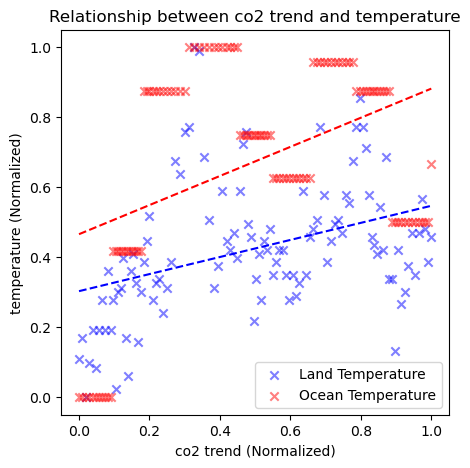

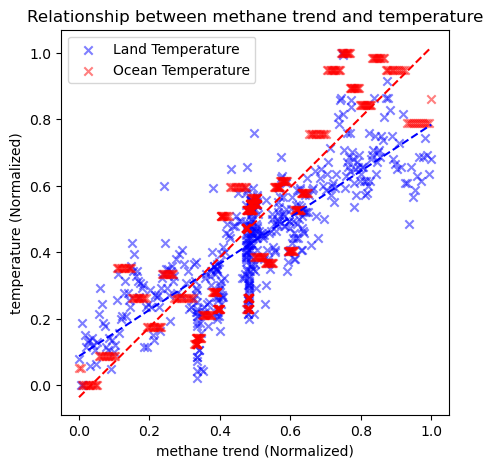

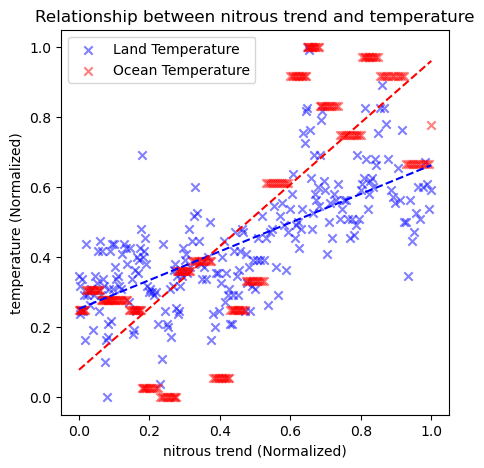

In [280]:
temp_and_another_trendline(df_gw, 'co2', 'trend')
temp_and_another_trendline(df_gw, 'methane', 'trend')
temp_and_another_trendline(df_gw, 'nitrous', 'trend')

Both average(or cycle) and trend has a similar trend line. The pattern of the ocean temperature is just because it's yearly observation. 

The thing that stands out most is that the slope of the trend line between methane gas and temperature is the steepest while the slope of the trend line of co2 and temperature is gentlest. Furthermore, the trend line between ocean temperature and greenhouse gases is steeper than land temperature. This implies the ocean temperature has more positive correlation with greenhouse gases.

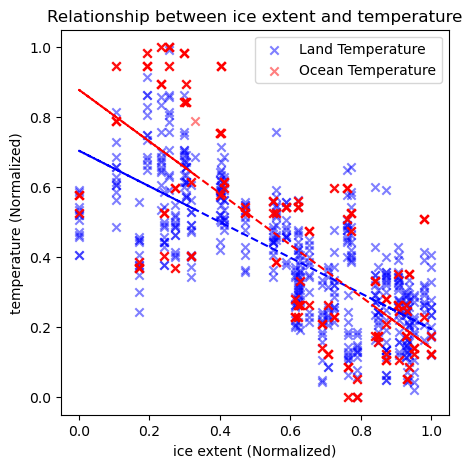

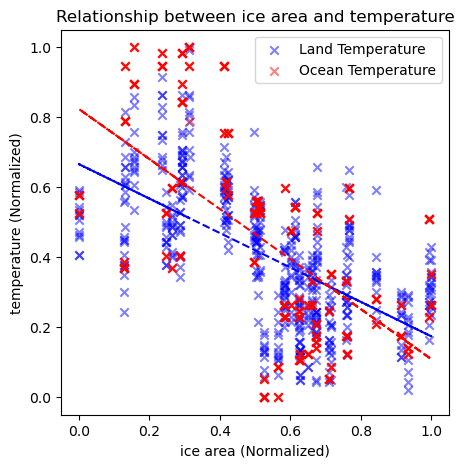

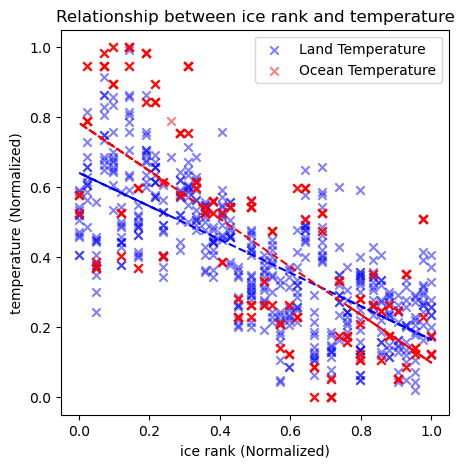

In [281]:
temp_and_another_trendline(df_gw, 'ice', 'extent')
temp_and_another_trendline(df_gw, 'ice', 'area')
temp_and_another_trendline(df_gw, 'ice', 'rank')

This stlatter plot and trend line can be interpreted as the area(and extent) of polar ice and temperature has negative correlations. As greenhous gases, ocean temperature has stronger correlations with polar ice.

Now, I'll visualize the correlation between polar ice rank and greenhouse gases. I've just normalized for the rank feature because ice features are related to each other, and I'll check only trend of gases because there was no difference between ice/trend and ice/others according to the heatmap. The higher rank(1), the smaller ice.

In [282]:
def ice_and_gas_trendline(df, column1, column2):
    df_ice_gas = make_subset(df, 'ice', f'{column1}')

    plt.figure(figsize=(5, 5))

    # calculate linear regression coefficients for trend line
    rank_coefs = np.polyfit(df_ice_gas[('ice', 'rank')], df_ice_gas[(f'{column1}', f'{column2}')], 1)
    rank_trend = np.poly1d(rank_coefs)

    #describe the graph
    plt.scatter(df_ice_gas['ice', 'rank'], df_ice_gas[f'{column1}', f'{column2}'], alpha=0.5, color='blue', label='Polar Ice Rank', marker='x')
    plt.plot(df_ice_gas['ice', 'rank'], rank_trend(df_ice_gas['ice', 'rank']), "b--")

    plt.title(f'Correlation between {column1} {column2} and Polar Ice Rank')
    plt.xlabel('Ice Rank (Normalized)')
    plt.ylabel(f'{column1} {column2} (Normalized)')
    plt.legend()

    plt.show()

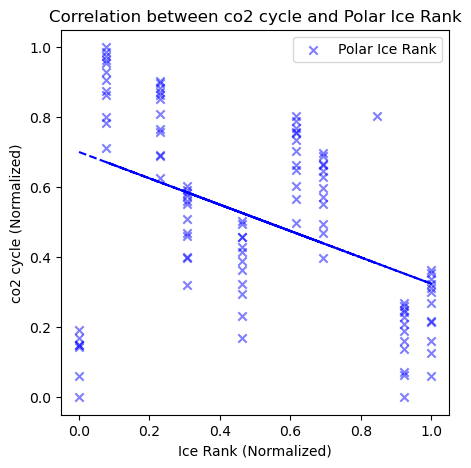

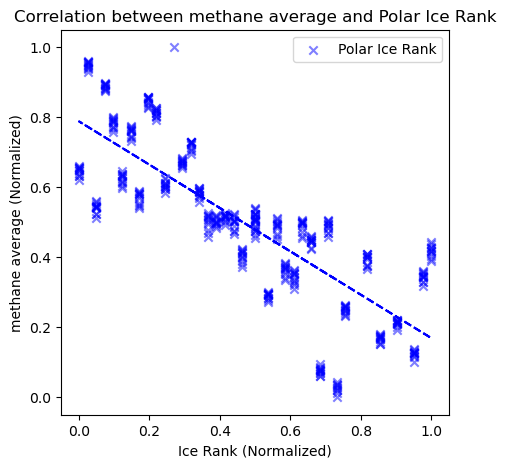

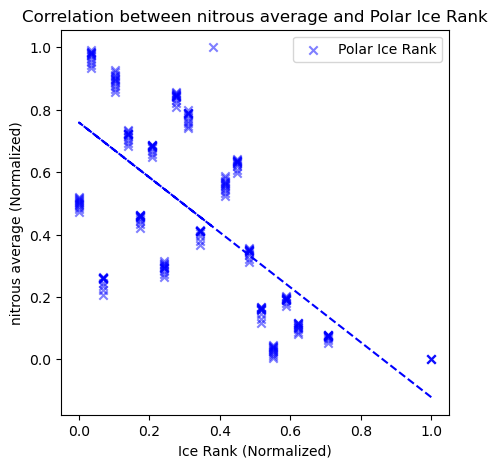

In [283]:
ice_and_gas_trendline(df_gw, 'co2', 'cycle')
ice_and_gas_trendline(df_gw, 'methane', 'average')
ice_and_gas_trendline(df_gw, 'nitrous', 'average')

In these splatter plots, I can see that green house gases has a negative correation with polar ice feature.

Unlike the heatmap, nitrous has the steepest slop of trend line. this is because the correlation coeffiient represents directionality and consistency, while the trend line represents the size of the change also.

# Tesk 3

## I. Challenges Faced in Collecting Data

The most challenging part of collecting data was the size of the datasets. I've used all the datasets the website provided, so all the datasets had it's own period. The start and end of the data period were different, and the length of the period was also different. Especially, CO2 dataset's observation cycle was almost daily, but the starting point was relatively recent(2013) while other were monthly datasets from 1880 and so on. Therefore, for the more accurate analysis, finding some expended dataset would be helpful.

And it was hard to find a metadata properly, so I had to rely on the short description of the website searching the terms of the features.

There was no API so there was no limitation to use datasets, but it would have been better that there were some more options to choose for global warming data analysis.

## II. Key Insights Gained form Analysis

1. Temperature(land, ocean) and greenhouse gases(methane, CO2, N2O) are increasing until now, while the extend an area of ice is decreasing.

2. There are upper outliers on land temperature feature not error, and it has been observed recently.

3. IQR of the ocean temperature is larger than land, so it has more volatile and sensitive.

4. All the gases are strongly related to each other.

5. CO2 has the lowest correlation coeffient(and the slope of the trend line) with temperature and polar ice among the three greenhouse gases.

6. Methane has the highest correlation coeffitient(and the slope of the trend line) with temperature among the three greenhouse gases.

7. Methane has the highest negative correlation coeffitient, but nitrous oxide's slope of trend line is steeper in relation to polar ice feature. This means that methane is increasing and decreasing like the land temperature more consistently, while nitrous oxide's influence to the polar ice change is stronger.

## III. Suggest Idea for Further Analysis

Firstly, correlation and causation are different, so causation analysis can be performed for the further analysis with causality test between greenhouse gases and temperature change.

Secondly, we can use other techniques such PCA to reduce the dimension, clustering to group and find some pattern.

Furthermore, the cause of the greenhouse gases can be performed also using datasets about human activities such as industrial development, policy change(Corona, effect of some policies, and so on), and energy usage patterns.

Moreover, we can analyze the relations between global warming and ecosystems such as biodiversity, sea level rise, and agricultural productivity for the insights of impact on the economy. Especially, animal migration which has some viruses which is harmful for human.

Lastly, simulation of the future temperature can be added modeling machine learning.